In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

#file path
file_path = r'E:\data set\IMDb Movies India.csv'

# Load the CSV file
data = pd.read_csv(file_path, sep=',', encoding='latin-1')
data1=pd.DataFrame(data)

In [4]:
data1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
data1.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## task to do

 Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.


The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

In [7]:
data1.shape

(15509, 10)

In [8]:
data1.Name.unique()

array([' ', '#Gadhvi (He thought he was Gandhi)', '#Homecoming', ...,
       'Zulmi Raj', 'Zulmi Shikari', 'Zulm-O-Sitam'], dtype=object)

## data cleaning

In [9]:
data1.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
data1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Data Preprocessing

In [11]:
# replacing the brackets from the year column
data1['Year']=data1['Year'].str.replace(r'[()]','',regex=True)


In [12]:
data1['Year']=data1['Year'].fillna(data1['Year'].median())

In [13]:
#converting year into float type
data1['Year']=data1['Year'].astype(float)

In [14]:
# remove the min word from the duration column and and convert all vlaues to numeric
data1['Duration']=pd.to_numeric(data1['Duration'].str.replace('min',''))

In [15]:
#filling meadian values in place of NaN calues into Duration
data1['Duration']=data1['Duration'].fillna(data1['Duration'].median())

In [16]:
data1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [17]:
# Convert 'Votes' to numeric, removing commas
data1['Votes'] = data1['Votes'].replace('[\$,]', '', regex=True).replace('M', '', regex=True).astype(float)

In [18]:
# Display the unique values in 'Votes' to ensure it's cleaned
data1['Votes'].unique()

array([       nan, 8.0000e+00, 3.5000e+01, ..., 7.0344e+04, 4.0800e+02,
       1.4960e+03])

In [19]:
# Handling missing values: Fill missing values for 'Duration' with the median value
data1['Duration']=data1['Duration'].fillna(data1['Duration'].median())

In [20]:
# Fill missing values for 'Votes' with 0 (assuming no votes is better than dropping the row)
data1['Votes'] = data1['Votes'].fillna(0)

In [21]:
data1.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [22]:
# for categorical variables with missing values , we can fill the placeholder with 'unknown'
data1['Genre']=data1['Genre'].fillna('unknown')
data1['Director']=data1['Director'].fillna('unknown')
data1['Actor 1']=data1['Actor 1'].fillna('unknown')
data1['Actor 2']=data1['Actor 2'].fillna('unknown')
data1['Actor 3']=data1['Actor 3'].fillna('unknown')

In [23]:
# Display the cleaned data and check for any remaining missing values
cleaned_data = data1
remaining_missing_values = cleaned_data.isnull().sum()

In [24]:
cleaned_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,NaN,0.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,0.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,0.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [25]:
# filling rating with median where there is null values
cleaned_data['Rating']=cleaned_data['Rating'].fillna(cleaned_data['Rating'].median())

In [26]:
cleaned_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [27]:
cleaned_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,6.0,0.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.0,0.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,6.0,0.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Feature Engineering

In [28]:
# Extract the first genre if there are multiple genres
cleaned_data['Genre']=cleaned_data['Genre'].str.split(',').str[0]

In [29]:
# Encode categorical variables using one-hot encoding
encoded_data=pd.get_dummies(cleaned_data,columns=['Genre','Director','Actor 1','Actor 2','Actor 3'])

In [30]:
encoded_data.head()

,Name,Year,Duration,Rating,Votes,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,...,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon,Actor 3_unknown
0,,1991.0,131.0,6.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,7.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,#Homecoming,2021.0,90.0,6.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019.0,110.0,4.4,35.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,...And Once Again,2010.0,105.0,6.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

In [31]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X=encoded_data.drop(columns=['Name','Rating'])
y=encoded_data['Rating']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Model Building

In [32]:
encoded_data['Genre_Action'].unique


<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
15504    1
15505    1
15506    1
15507    1
15508    1
Name: Genre_Action, Length: 15509, dtype: uint8>

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

#initialize the model
regressor=RandomForestRegressor(n_estimators=100,random_state=42)

#train the model
regressor.fit(X_train,y_train)

In [ ]:
y_pred=regressor.predict(X_test)

# Ensure the shapes match
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")


Shape of y_test: (4653,)
Shape of y_pred: (4653,)


In [ ]:
# calculate the performance metrics
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"the r2 score is: {r2}")

Mean Squared Error: 0.6398506501182033
the r2 score is: 0.34934854991711917


In [ ]:
encoded_data.shape

(15509, 20398)

# Data visualization

###  Distribution of ratings:

Text(0, 0.5, 'frequency')

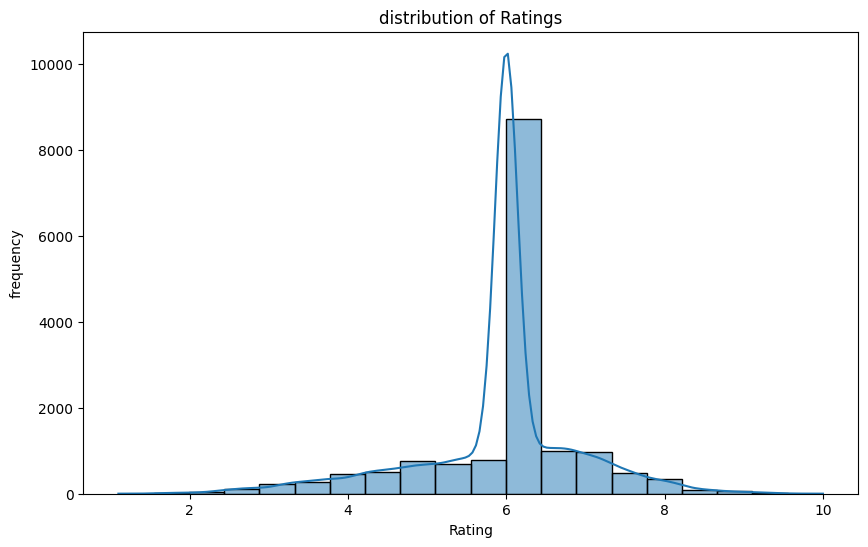

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(encoded_data['Rating'],bins=20,kde=True)
plt.title('distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('frequency')

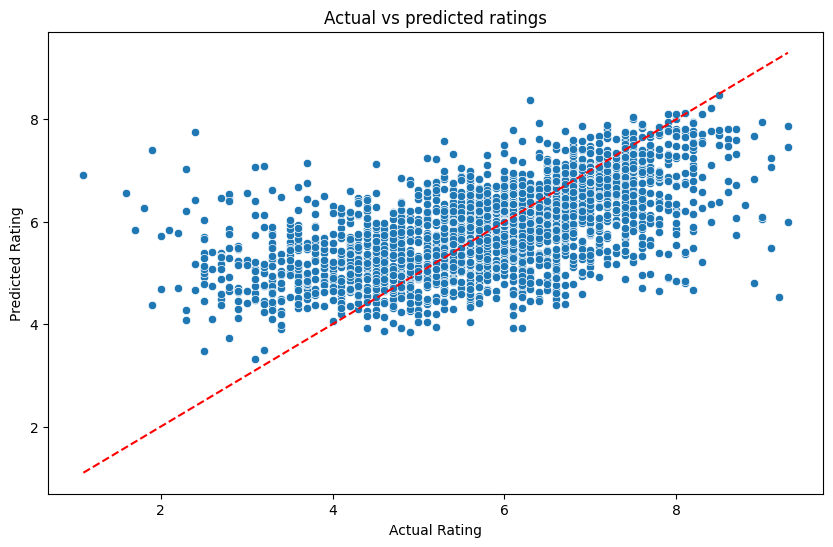

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs predicted ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()


In [ ]:
# Feature importance from the random forest model
importances = regressor.feature_importances_
feature_names = X.columns


In [ ]:
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

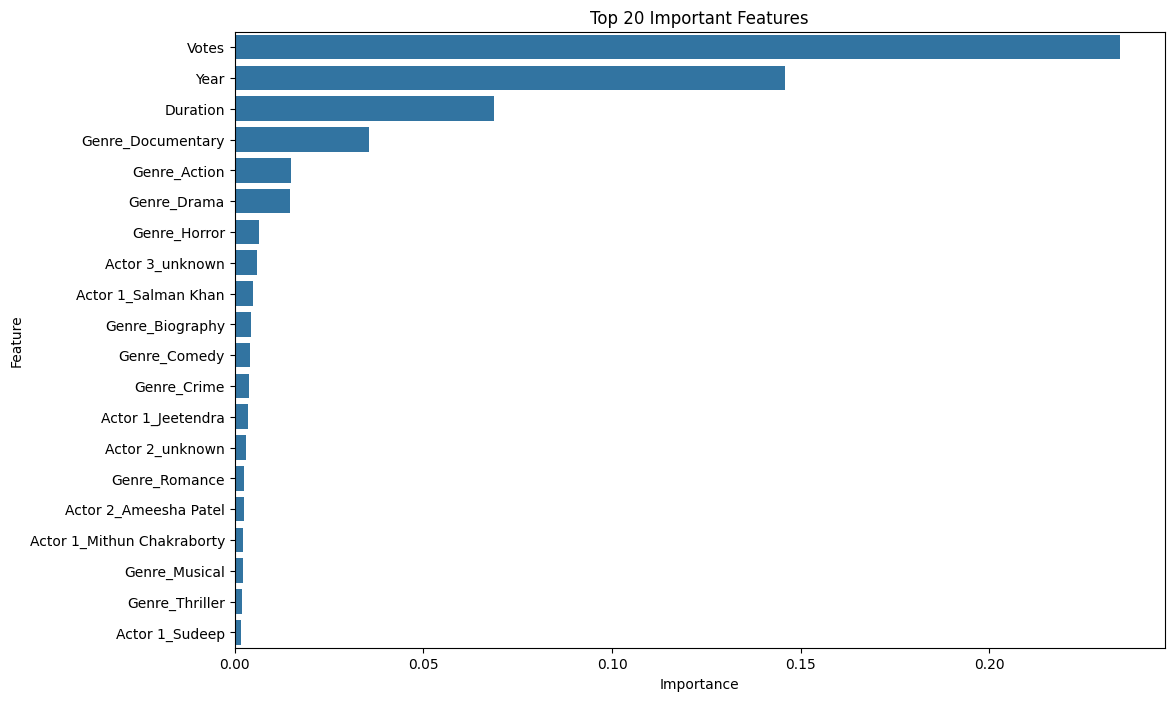

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Important Features')
plt.show()

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = cleaned_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

NameError: name 'plt' is not defined